**Logistic regression using adult.csv**

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [193]:
adult_df=pd.read_csv(r'C:\Python\Logistic\adult_data.csv',header=None,delimiter=' *, *',engine='python')
adult_df.head()

#there are no headers we will manually handle headers later
#delimiter == remove the special characters like '?'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [194]:
print(adult_df.dtypes)
print(adult_df.shape)
print(adult_df.describe())

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object
(32561, 15)
                 0             2             4             10            11  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05      2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04      1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05      9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05     10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05     12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06     16.000000  99999.000000   4356.000000   

                 12  
count  32561.000000  
mean      40.437456  
s

In [195]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)   #incase of spyder

In [196]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [197]:
adult_df.shape

(32561, 15)

**Pre processing the data**

In [198]:
#create a copy of the data frame to revert back to changes

adult_df_rev=pd.DataFrame.copy(adult_df)

In [199]:
adult_df_rev=adult_df_rev.drop(["education",'fnlwgt'],axis=1)

#drop insignificant variables

In [200]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Handling the missing values**

In [201]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [202]:
adult_df_rev=adult_df_rev.replace(['?'], np.nan)

#replace '?' with na

In [203]:
#adult_df_rev=adult_df_rev.replace(['?','-'], np.nan)
#can be used to pass multiple characters also

In [204]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [205]:
#using mode impute the mssing values

for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [206]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [207]:
##generic code to handle all missing values together for object as well as float/int variable

"""
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""


"\nfor x in adult_df_rev.columns[:]:\n    if adult_df_rev[x].dtype=='object':\n        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\n    elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)\n"

**Mandatory Step : Converting categorical data to numerical**

In [208]:
adult_df_rev.workclass.value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [209]:
colname = ['workclass', 
'marital_status', 'occupation',
'relationship','race', 'sex',
'native_country', 'income']

colname


['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

**OR**

In [210]:
colname = []

for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
        
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [211]:
# For Preprocessing the data
# convert all categorical variables into numeric variables

from sklearn import preprocessing

le=preprocessing.LabelEncoder()    #LabelEncoder()  == technique of transformation == object to int/float

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])

In [212]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [213]:
adult_df_rev.head()

#0 == <=50K
#1 == >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [214]:
#Create x and y

X = adult_df_rev.values[: , 0:-1]   
Y = adult_df_rev.values[: , -1]

**Normalization == MinMaxScaler() == 0 to 1**

**Standardization == StandardScaler() == -3 to +3**

In [215]:
#Scaling is not compulsory but can be used to get better accuracy
#Scaling can be done only on X
#Standardization is used mostly for better accuracy
#fitting is only done on training data

In [216]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [217]:
Y=Y.astype(int)   #typecast Y into int to avoid error in the model

#to avoid the error 'unknown label unknown' which is generated due to the mismatch of datatypes of x and y

**Running a Basic Model**

In [218]:
#X == scaled
#Y == tested

#train_test_split == split the data into random sampling to aviod biasness

In [219]:
from sklearn.model_selection import train_test_split

#Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)    #random_state == set.seed(123) in R



In [220]:
from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)


[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [221]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)



[[7017  406]
 [1316 1030]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8237281195618794


**Adjusting the threshold**

In [222]:
#store the predicted probabilities

y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]


In [223]:
y_pred_class = []    #create an empty list

for value in y_pred_prob[:,1]:       #all rows but only 1st column
    if value > 0.45:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model: ",acc)



[[6878  545]
 [1189 1157]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.68      0.49      0.57      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8224997440884431


In [225]:
y_pred_class2 = []    #create an empty list

for value in y_pred_prob[:,1]:       #all rows but only 1st column
    if value > 0.40:
        y_pred_class2.append(1)
    else:
        y_pred_class2.append(0)
print(y_pred_class2)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,y_pred_class2)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,y_pred_class2))

acc=accuracy_score(Y_test,y_pred_class2)
print("Accuracy of the model: ",acc)



[[6727  696]
 [1072 1274]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7423
           1       0.65      0.54      0.59      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.75      0.72      0.74      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8190193469137066


In [227]:
y_pred_class3 = []    #create an empty list

for value in y_pred_prob[:,1]:       #all rows but only 1st column
    if value > 0.55:
        y_pred_class3.append(1)
    else:
        y_pred_class3.append(0)
print(y_pred_class3)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [228]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,y_pred_class3)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,y_pred_class3))

acc=accuracy_score(Y_test,y_pred_class3)
print("Accuracy of the model: ",acc)


[[7109  314]
 [1417  929]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7423
           1       0.75      0.40      0.52      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.79      0.68      0.70      9769
weighted avg       0.81      0.82      0.80      9769

Accuracy of the model:  0.8228068379568021


**Decide the best Threshold at a difference of 0.05**

In [229]:
for a in np.arange(0,1,0.05):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]     #first row and 0th index, 2nd row and 1st index
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 7423  , type 2 error : 0  , type 1 error: 7423
Errors at threshold  0.05 : 5137  , type 2 error : 66  , type 1 error: 5071
Errors at threshold  0.1 : 3865  , type 2 error : 158  , type 1 error: 3707
Errors at threshold  0.15000000000000002 : 3089  , type 2 error : 272  , type 1 error: 2817
Errors at threshold  0.2 : 2526  , type 2 error : 438  , type 1 error: 2088
Errors at threshold  0.25 : 2172  , type 2 error : 610  , type 1 error: 1562
Errors at threshold  0.30000000000000004 : 1956  , type 2 error : 765  , type 1 error: 1191
Errors at threshold  0.35000000000000003 : 1846  , type 2 error : 938  , type 1 error: 908
Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.45 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.5 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at threshold  0.55 : 1731  , type 2 error : 1417  , type 1 error: 314
Errors at threshold  0.6000000000000001 

In [230]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]     #first row and 0th index, 2nd row and 1st index
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 7423  , type 2 error : 0  , type 1 error: 7423
Errors at threshold  0.01 : 7068  , type 2 error : 0  , type 1 error: 7068
Errors at threshold  0.02 : 6498  , type 2 error : 7  , type 1 error: 6491
Errors at threshold  0.03 : 5951  , type 2 error : 24  , type 1 error: 5927
Errors at threshold  0.04 : 5508  , type 2 error : 45  , type 1 error: 5463
Errors at threshold  0.05 : 5137  , type 2 error : 66  , type 1 error: 5071
Errors at threshold  0.06 : 4840  , type 2 error : 92  , type 1 error: 4748
Errors at threshold  0.07 : 4535  , type 2 error : 106  , type 1 error: 4429
Errors at threshold  0.08 : 4261  , type 2 error : 122  , type 1 error: 4139
Errors at threshold  0.09 : 4053  , type 2 error : 138  , type 1 error: 3915
Errors at threshold  0.1 : 3865  , type 2 error : 158  , type 1 error: 3707
Errors at threshold  0.11 : 3688  , type 2 error : 170  , type 1 error: 3518
Errors at threshold  0.12 : 3509  , type 2 error : 190  , type 1 error: 3319
Errors at t

In [231]:
y_pred_class4 = []    #create an empty list

for value in y_pred_prob[:,1]:       #all rows but only 1st column
    if value > 0.46:
        y_pred_class4.append(1)
    else:
        y_pred_class4.append(0)
print(y_pred_class4)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,y_pred_class4)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,y_pred_class4))

acc=accuracy_score(Y_test,y_pred_class4)
print("Accuracy of the model: ",acc)


[[6910  513]
 [1208 1138]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8238304841846658


Assignment:

preprocess

convert categorical to numeric

x_test_new and y_test_new

scale data

predict_proba on (x_new_test)

run with 0.46 as threshold

y_pred_new

evaluate the model

**Assignment**

In [233]:
adult_data=pd.read_csv(r'C:\Python\Logistic\adult_test.csv',header=None,delimiter=' *, *',engine='python')
adult_data.head()

#there are no headers we will manually handle headers later
#delimiter == remove the special characters like '?'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [359]:
print(adult_data.dtypes)
print(adult_data.shape)
print(adult_data.describe())

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object
(16281, 13)
                age     workclass  education_num  marital_status  \
count  16281.000000  16281.000000   16281.000000    16281.000000   
mean      38.767459      3.110128      10.072907        2.632578   
std       13.849187      1.117966       2.567545        1.510611   
min       17.000000      0.000000       1.000000        0.000000   
25%       28.000000      3.000000       9.000000        2.000000   
50%       37.000000      3.000000      10.000000        2.000000   
75%       48.000000      3.000000      12.000000        4.000000   
max       90.000000      7.000000      16.000000        6.000000   

         occupation  relationship          race  

In [235]:
adult_data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [236]:
adult_data=adult_data.drop(["education",'fnlwgt'],axis=1)

#drop insignificant variables

In [237]:
adult_data

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [238]:
adult_data.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [239]:
adult_data=adult_data.replace(['?'], np.nan)

#replace '?' with na

In [240]:
adult_data.isnull().sum()

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [241]:
#using mode impute the mssing values

for value in ['workclass','occupation','native_country']:
    adult_data[value].fillna(adult_data[value].mode()[0],inplace=True)

In [242]:
adult_data.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [243]:
#convert categotical into numeric

colname = []

for x in adult_data.columns[:]:
    if adult_data[x].dtype=='object':
        colname.append(x)
        
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [244]:
# For Preprocessing the data
# convert all categorical variables into numeric variables

from sklearn import preprocessing

le=preprocessing.LabelEncoder()    #LabelEncoder()  == technique of transformation == object to int/float

for x in colname:
    adult_data[x]=le.fit_transform(adult_data[x])

In [245]:
adult_data.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [246]:
#Create x and y

x1 = adult_data.values[: , 0:-1]   
y1 = adult_data.values[: , -1]

In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x1)

x1 = scaler.transform(x1)
print(x1)

[[-0.99412926 -0.09851079 -1.19686359 ... -0.21806206 -0.03143184
   0.25775643]
 [-0.05541716 -0.09851079 -0.41788553 ... -0.21806206  0.7699177
   0.25775643]
 [-0.77750339 -1.88752825  0.75058156 ... -0.21806206 -0.03143184
   0.25775643]
 ...
 [-0.05541716 -0.09851079  1.14007059 ... -0.21806206  0.7699177
   0.25775643]
 [ 0.37783458 -0.09851079  1.14007059 ... -0.21806206 -0.03143184
   0.25775643]
 [-0.27204303  0.79599794  1.14007059 ... -0.21806206  1.57126723
   0.25775643]]


C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [248]:
y1=y1.astype(int)   #typecast Y into int to avoid error in the model

#to avoid the error 'unknown label unknown' which is generated due to the mismatch of datatypes of x and y

In [249]:
from sklearn.model_selection import train_test_split

#Split the data into test and train

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=10)    #random_state == set.seed(123) in R


In [250]:
y_pred_new = classifier.predict_proba(X_test1)
print(y_pred_new)

[[0.69980852 0.30019148]
 [0.84880482 0.15119518]
 [0.82342834 0.17657166]
 ...
 [0.87814518 0.12185482]
 [0.66980115 0.33019885]
 [0.81294552 0.18705448]]


In [251]:
y_pred_class_test = []    #create an empty list

for value in y_pred_new[:,1]:       #all rows but only 1st column
    if value > 0.46:
        y_pred_class_test.append(1)
    else:
        y_pred_class_test.append(0)
print(y_pred_class_test)

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 

In [252]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm1=confusion_matrix(Y_test1,y_pred_class_test)
print(cfm1)

print("Classification report: ")


print(classification_report(Y_test1,y_pred_class_test))

acc1=accuracy_score(Y_test1,y_pred_class_test)
print("Accuracy of the model: ",acc1)


[[3429  278]
 [ 578  600]]
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3707
           1       0.68      0.51      0.58      1178

   micro avg       0.82      0.82      0.82      4885
   macro avg       0.77      0.72      0.74      4885
weighted avg       0.81      0.82      0.82      4885

Accuracy of the model:  0.8247697031729785


**End**

In [253]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_prob[:,1])     #for default threshold 0.5
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.8510128825880344
[0.         0.         0.         ... 0.99555436 0.99582379 1.        ]
[0.00000000e+00 8.52514919e-04 2.55754476e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


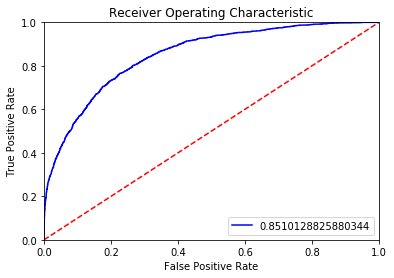

In [254]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')    #title
plt.plot(fpr, tpr, 'b', label = auc)    #b=color of auc line, label = auc
plt.legend(loc = 'lower right')     #legend=to place auc value according to user
plt.plot([0, 1], [0, 1],'r--')     #'r--'=red dotted line, ([0,1],[0,1]) = x and y axis
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()



In [255]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class4)    #adjusted threshold 0.46
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7079857322331378
[0.         0.06910952 1.        ]
[0.         0.48508099 1.        ]


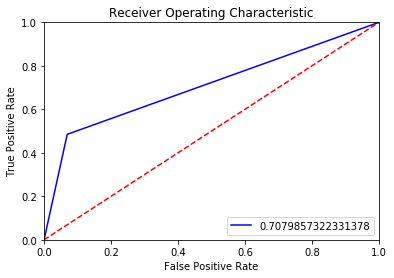

In [256]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


**Cross validation model**

Works only upon the training data

If both accuracies are almost similar we conclude the base model was good and it wasnt overfitting the data and we can go ahead with that model

If I see a considerable difference between both the accuracies then go ahead with the Cross Validation Model

In [257]:
classifier=(LogisticRegression())    #pass the name of the parameter you want to run

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)      #10 iterations can be changed also, by default 3
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,y=Y_train, cv=kfold_cv)
#estimator == specify the name of the algorithm (logistic), 10 fold model on training data

print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


KFold(n_splits=10, random_state=None, shuffle=False)


C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

[0.81842105 0.81403509 0.81790259 0.85037297 0.82974989 0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240617614681722


C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Conclusion: Since there is no diffence in accuracy use the base model

Stop at this step if you just want to evaluate the model using cross validation technique

Incase you try to go ahead with the cross validation model go ahead with the cross validation model

In [258]:
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
    
#train_value represents 9 train folds and test_value represents the 1 test fold

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))


C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ALI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [259]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


[[7016  407]
 [1315 1031]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8237281195618794


**Recursive Feature Elimination**

In [274]:
classifier=(LogisticRegression())

In [275]:
colname=adult_df_rev.columns[:]

In [276]:
from sklearn.feature_selection import RFE

rfe = RFE(classifier,10)
model_rfe = rfe.fit(X_train,Y_train)

print("Num Features: ",model_rfe.n_features_)     #number of iterations
print("Selected Features: ")
print(list(zip(colname,model_rfe.support_)))     #boolean list showing which elements were retained and which were eliminated
print("Feature Ranking: ",model_rfe.ranking_)    #rank 1 == retained elements, highest rank means the element was eliminated first


Num Features:  10
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 1 1 1 2 1 1 1 1 1 1 3]


In [277]:
import warnings
warnings.filterwarnings("ignore")

In [278]:
y_pred_rfe=model_rfea.predict(X_test)

In [279]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cmatrix=confusion_matrix(Y_test,y_pred_rfe)
print(cmatrix)

print("Classification report: ")


print(classification_report(Y_test,y_pred_rfe))

acc2=accuracy_score(Y_test,y_pred_rfe)
print("Accuracy of the model: ",acc2)


[[7019  404]
 [1317 1029]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8238304841846658


**Conclusion : Eliminating variables does not always end up giving you up a good model**

In [ ]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""


**Feature selection using Univariate Selection**

In [304]:
#Create x and y

X = adult_df_rev.values[: , 0:-1]   
Y = adult_df_rev.values[: , -1]

In [305]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


test = SelectKBest(score_func=chi2, k=9)
fit1 = test.fit(X, Y)    #store the chi2 values

print(fit1.scores_)   #display the chi2 values
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)     #select the 10 best values and override X with the 10 best values

print(X)


[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
[[   39    13     4 ...  2174     0    40]
 [   50    13     2 ...     0     0    13]
 [   38     9     0 ...     0     0    40]
 ...
 [   58     9     6 ...     0     0    40]
 [   22     9     4 ...     0     0    20]
 [   52     9     2 ... 15024     0    40]]


In [306]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.03067056  1.13473876  0.92163395 ...  0.1484529  -0.21665953
  -0.03542945]
 [ 0.83710898  1.13473876 -0.4062122  ... -0.14592048 -0.21665953
  -2.22215312]
 [-0.04264203 -0.42005962 -1.73405835 ... -0.14592048 -0.21665953
  -0.03542945]
 ...
 [ 1.42360965 -0.42005962  2.24948009 ... -0.14592048 -0.21665953
  -0.03542945]
 [-1.21564337 -0.42005962  0.92163395 ... -0.14592048 -0.21665953
  -1.65522476]
 [ 0.98373415 -0.42005962 -0.4062122  ...  1.88842434 -0.21665953
  -0.03542945]]


In [307]:
Y=Y.astype(int)   #typecast Y into int to avoid error in the model

#to avoid the error 'unknown label unknown' which is generated due to the mismatch of datatypes of x and y

In [308]:
from sklearn.model_selection import train_test_split

#Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)    #random_state == set.seed(123) in R



In [309]:
from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [311]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


[[7016  407]
 [1323 1023]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8229092025795884


**Variance Threshold**

In [352]:
#Create x and y

X = adult_df_rev.values[: , 0:-1]   
Y = adult_df_rev.values[: , -1]

In [353]:
from sklearn.feature_selection import VarianceThreshold
vt= VarianceThreshold(0.3)
fit1=vt.fit(X,Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features)
print(features.shape[1])
print(list(zip(colname,fit1.get_support())))


[1.86055686e+02 1.22584081e+00 6.61868663e+00 2.26863420e+00
 1.57819202e+01 2.58163360e+00 7.20448827e-01 2.21369502e-01
 5.45408641e+07 1.62371951e+05 1.52454313e+02 3.66745732e+01]
[[39  6 13 ...  0 40 38]
 [50  5 13 ...  0 13 38]
 [38  3  9 ...  0 40 38]
 ...
 [58  3  9 ...  0 40 38]
 [22  3  9 ...  0 20 38]
 [52  4  9 ...  0 40 38]]
11
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


In [354]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [355]:
Y=Y.astype(int)   #typecast Y into int to avoid error in the model

#to avoid the error 'unknown label unknown' which is generated due to the mismatch of datatypes of x and y

In [356]:
from sklearn.model_selection import train_test_split

#Split the data into test and train

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)    #random_state == set.seed(123) in R



In [357]:
from sklearn.linear_model import LogisticRegression

#create a model object
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[(0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

In [358]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")


print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


[[7017  406]
 [1316 1030]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8237281195618794


**Maximum threshold we pass should be 0.3**